In [2]:
import os
import sys
import json
import cv2
import PIL 
import typing
import torch
from pathlib import Path
import numpy as np
import matplotlib.pyplot as plt
import albumentations as A

from src import utils
from src.data.mean_std_dataset import load_mean_std

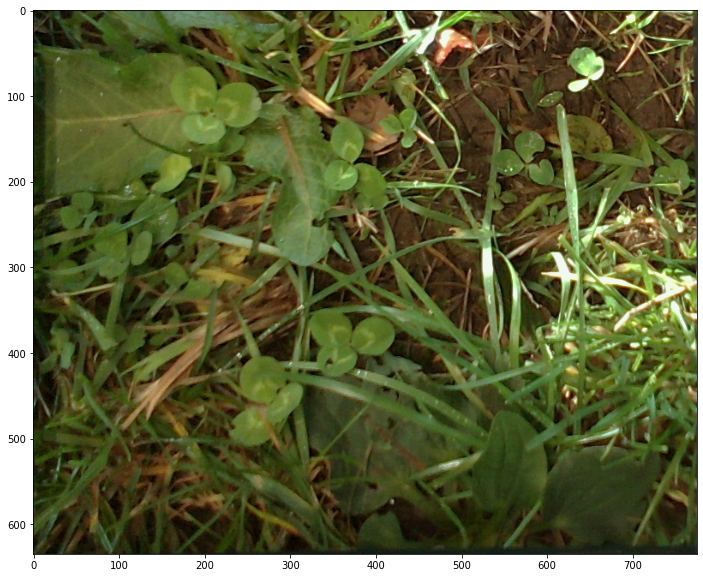

In [6]:
data = np.load('/zhome/3b/d/154066/repos/GALIROOT/data/interim/100.npy')
transform = A.Compose([A.Crop(x_min=345, y_min=365, x_max=1120, y_max=1000)])
data = transform(image = data[:,:,0:4], mask = data[:,:,4])
depth = data['image'][:,:,3]
image = data['image'][:,:,0:3]
mask = data['mask']
plt.figure(figsize=(20,10))
plt.imshow(image)
# plt.imshow(depth, alpha=0.9)
# plt.imshow(mask, 'gray', interpolation='none', alpha=0.6)
plt.show()

In [58]:
mask.max()

1

In [63]:
np.where(mask==1)

(array([702]), array([947]))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


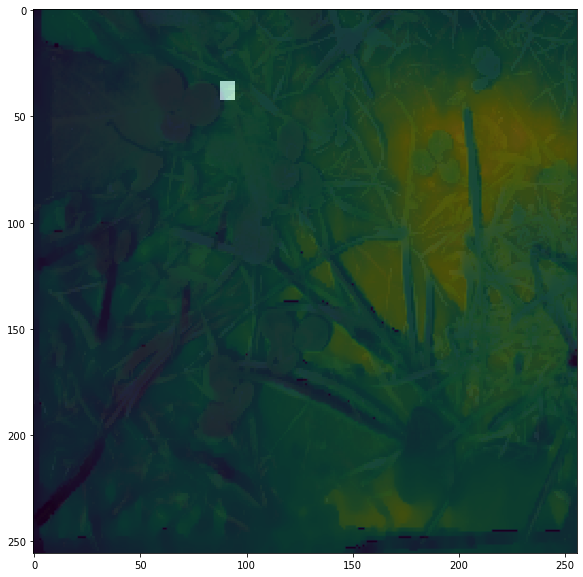

In [5]:
data = np.load('/zhome/3b/d/154066/repos/GALIROOT/data/processed/100.npy')
mean_std_dict = load_mean_std('../data/interim')

image = data[:,:,0:3]
depth = data[:,:,3]
mask = data[:,:,4]

plt.figure(figsize=(20,10))
plt.imshow(image, interpolation='none')
plt.imshow(depth, alpha=0.9)
plt.imshow(mask, 'gray', interpolation='none', alpha=0.6)
plt.show()

## Normalization proof of concept

Testing the normalization and minmax normalization differenc on a random array.

In [77]:
# img = (np.random.rand(50))*255

# plt.figure(1)
# plt.hist(img, bins=10)

# img_01 = (img-min(img))/(max(img)-min(img))

# plt.figure(2)
# plt.hist(img_01, bins=10)

# img_norm1 = (img_01-img_01.mean())/img_01.std()

# plt.figure(3)
# plt.hist(img_norm1, bins=10)

# img_norm2 = (img-img.mean())/img.std()

# plt.figure(4)
# plt.hist(img_norm2, bins=10)


Testing the same on an rgb image.

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


255 0
4.310800182832834 -1.5391732426038445


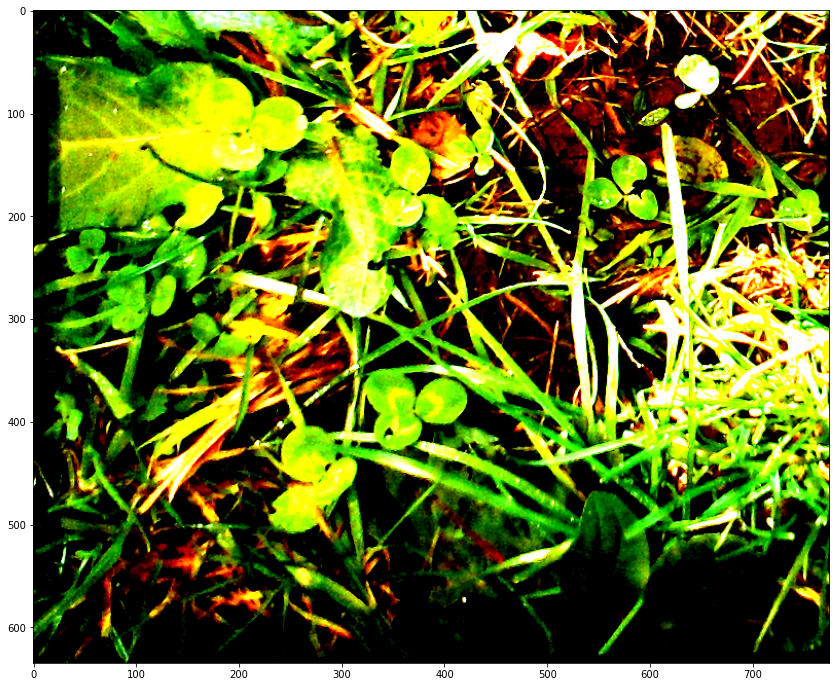

In [78]:
data = np.load('/zhome/3b/d/154066/repos/GALIROOT/data/interim/100.npy')

image = transform(image=data[:,:,0:3])['image']

print(image.max(), image.min())

# image = (image - image.min())/(image.max()-image.min())

# print(image.max(), image.min())

image = (image - image.mean()) / image.std()

print(image.max(), image.min())

# image = (image - image.min())/(image.max()-image.min())

# print(image.max(), image.min())
plt.figure(figsize=(15,12))
plt.imshow(image)

Testing it on a depth image.

486 400
1.9150718747511357 -2.711253341654245


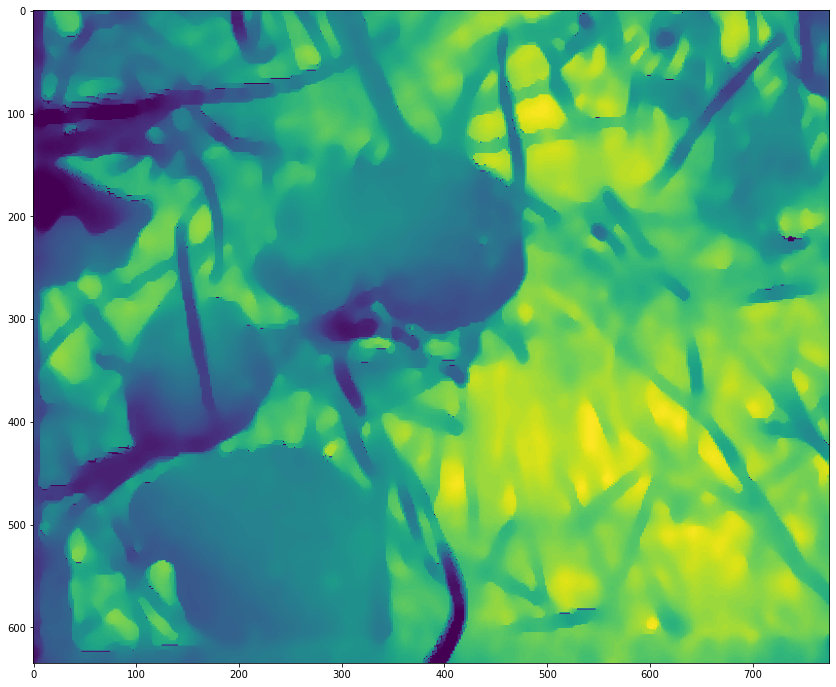

In [79]:
data = np.load('/zhome/3b/d/154066/repos/GALIROOT/data/interim/50.npy')

image = transform(image=data[:,:,3])['image']

image = image.clip(400,500)

print(image.max(), image.min())

# image = (image - image.min())/(image.max()-image.min())

# print(image.max(), image.min())

image = (image - image.mean()) / image.std()

print(image.max(), image.min())

image = (image - image.min())/(image.max()-image.min())

# print(image.max(), image.min())

plt.figure(figsize=(15,12))
plt.imshow(image)

In [ ]:
mask = np.asarray(Image.open('/zhome/3b/d/154066/repos/GALIROOT/data/raw/20200623_skaevinge_rgb_0_1624440779081895351.png'))

NameError: name 'Image' is not defined